# Project Title: Toxic Comments Classification

#### Team Members

- Rakhat Zhussupekov
- Sadat Ahmed Ameyaw
- Veselina Bulatova
- Ahastasiia Kleschevnikova

#### Project Description: 
Online platforms often face challenges in maintaining respectful and productive discussions due to toxic comments, which can include threats, obscenity, insults, and identity-based hate. This project aims to build a machine learning model to identify and classify such toxic comments, helping platforms foster healthier interactions. The initiative builds upon research by the Conversation AI team at Jigsaw and Google, aiming to improve existing toxicity detection models.

**These issues often lead to such Business problems**:


- Online platforms are losing user engagement and participation due to toxic comments
- Manual moderation is expensive, slow, and inconsistent
- Platforms often resort to shutting down comments entirely, losing community interaction
- Existing models (like Perspective API) lack granular toxicity detection.  (only provides a single "toxicity" score, treating all forms of toxicity as a single category). This makes it difficult for platforms to selectively moderate different types of toxic content (e.g. allowing profanity but blocking threats) – This was said in the Kaggle description of the case.

And the fiancial impact of such problems if not solved include the following:

**Financial Impact of the Problem**
1.	Direct Costs: 
o	Manual moderation staff costs
o	Lost advertising revenue from reduced user engagement
o	Platform maintenance costs for basic moderation tools
2.	Indirect Costs: 
o	User churn due to toxic environment
o	Reduced content creation
o	Brand damage from toxic content
o	Legal risks from unmoderated harmful content

#### Objective:
The goal is to create a multi-label classification model capable of predicting the probability of various types of toxicity for a given comment. The model should improve upon existing tools, such as the Perspective API, by providing nuanced predictions and reducing errors.

#### Data Source: 
The dataset is sourced from Wikipedia’s talk page edits and is publicly available on [Kaggle](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview). It includes comments labeled for six types of toxicity:

- Toxic
- Severe toxic
- Obscene
- Threat
- Insult
- Identity hat

#### Dataset Files:

- train.csv: Contains labeled comments for training the model.
- test.csv: Unlabeled comments for testing the model predictions.
- test_labels.csv: True labels for test data (for evaluation).

#### Dataset Columns:

- id: Unique identifier for each comment.
- comment_text: Text of the comment.
- toxic, severe_toxic, obscene, threat, insult, identity_hate: Binary labels indicating the presence (1) or absence (0) of each toxicity type.

#### Scope: This project will involve:

- Exploratory Data Analysis (EDA): To understand the dataset distribution and uncover patterns in toxic comments.
- Data Preprocessing: Cleaning and preparing text data for machine learning.
- Model Development: Building and evaluating a multi-label classification model.
- Evaluation: Comparing the model's performance against existing benchmarks.



In [ ]:
pip install contractions

done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

In [25]:
pip install spacy

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - spacy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    catalogue-2.0.10           |  py310hff52083_0          35 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    cloudpathlib-0.20.0        |     pyhd8ed1ab_0          43 KB  conda-forge
    confection-0.1.4           |  py310h17c5347_0          66 KB  conda-forge
    cymem-2.0.8                |  py310hf71b8c6_

In [ ]:
du -ah ~ | sort -n -r | head -n 20

In [16]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.5 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!df -hrm -rf /tmp/*



In [3]:
%time

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, FastText, KeyedVectors
import spacy
import contractions
from sklearn.model_selection import train_test_split
import random
import os

# Load datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_labels = pd.read_csv('test_labels.csv')

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


train_data.head(20)

#Comment Length
all_X = train_data['comment_text'].apply(lambda x: len(x))
print(f"The average comment text length is {all_X.mean()}")


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/conda/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train data shape: (159571, 8)
Test data shape: (153164, 2)
The average comment text length is 394.0732213246768


In [4]:
# pip install spacy

# if you get dependencies issues use my requiremwnts file


# Download necessary NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
# nltk.download('all')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
%time
test_data.head()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
%time
test_labels.head()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [7]:
train_data[train_data['toxic']==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [8]:
%time
train_data.info()

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 5.96 µs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


There are total of 159571 data points and there are not missing data. Also the data has 8 columns which include 
the column id, the text and the toxic types. There are two objects  which is the id and the comment text and the 
toxic types being integers which is basically 0s and 1s 
where 1 means a comment belongs to a specific type of toxicity if this number belongs to a certain type of toxic comment.

# EDA

In [9]:
print("Check for missing values in Train dataset")
null_check=train_data.isnull().sum()
print(null_check)
print("Check for missing values in Test dataset")
null_check=test_data.isnull().sum()
print(null_check)


Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs


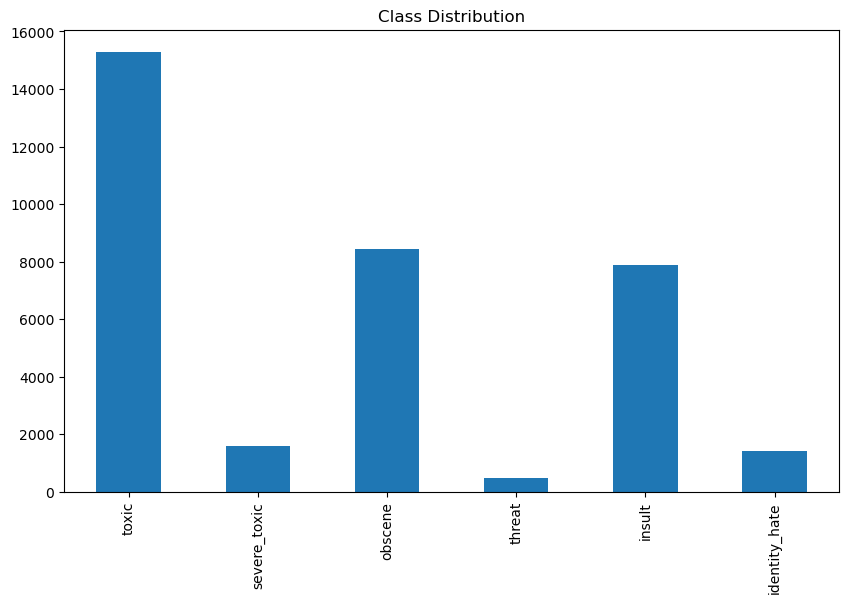

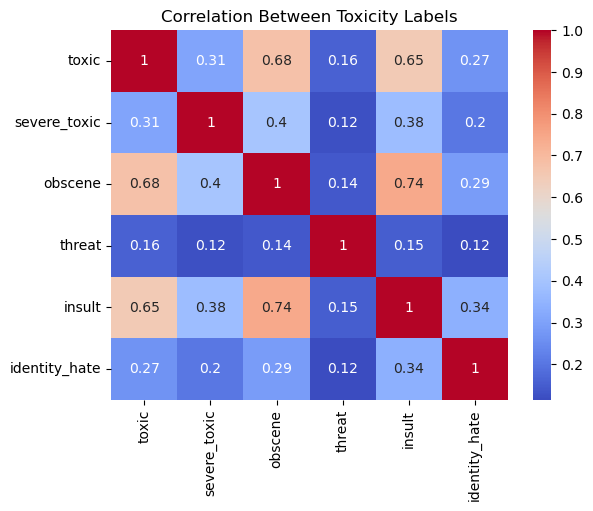

In [16]:
%time

import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_data[label_cols].sum().plot(kind='bar', figsize=(10, 6), title='Class Distribution')
plt.show()


# Correlation
correlation_matrix = train_data[label_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Toxicity Labels')
plt.show()


In [17]:
%time
# Count number of each category of comment
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'] 
category_count = {col: train_data[col].sum() for col in label_columns}
print(category_count)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs
{'toxic': 15294, 'severe_toxic': 1595, 'obscene': 8449, 'threat': 478, 'insult': 7877, 'identity_hate': 1405}


##### Class Imbalance:
The dataset is highly imbalanced with some classes (e.g., 'toxic', 'obscene', 'insult') 
being more prevalent, while others (e.g., 'threat', 'identity_hate') have very few instances.
This could lead to biased model predictions favoring the majority classes.


###### Model Considerations:
- Given the imbalance, We will consider techniques like class weighting, oversampling, or SMOTE which might be necessary to improve model performance on minority classes.
- We will also Consider using metrics like F1-Score, Precision, and Recall over Accuracy for better performance evaluation.

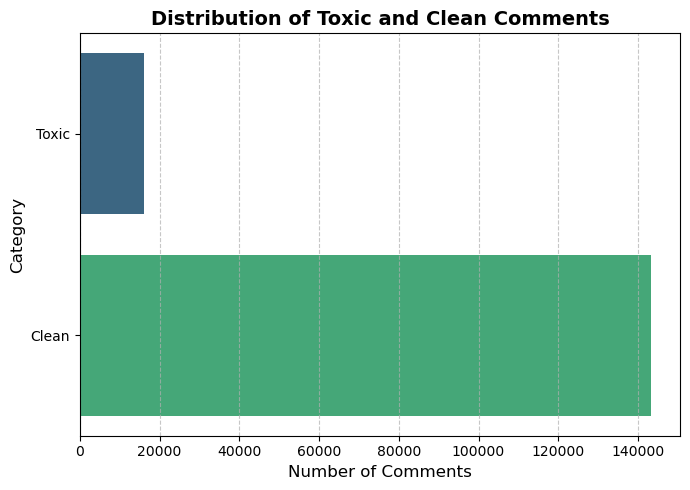

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels for toxic categories
column_labels = train_data.columns[2:]

# Calculate the number of toxic and clean comments
train_data['is_toxic'] = train_data[column_labels].sum(axis=1) > 0  # Flag toxic comments
num_toxic = train_data['is_toxic'].sum()  # Total toxic comments
num_clean = len(train_data) - num_toxic  # Total clean comments

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'Category': ['Toxic', 'Clean'],
    'Count': [num_toxic, num_clean]
})

# Plot the distribution
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Count', y='Category', data=plot_data, palette='viridis')
plt.xlabel('Number of Comments', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Distribution of Toxic and Clean Comments', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# lets see the actual proportion of each part of the toxic comments and non toxic
toxic_count = train_data['is_toxic'].sum()  # Total toxic comments
clean_count = len(train_data) - toxic_count  # Total clean comments


print(f"Toxic Comments: {toxic_count} rows")
print(f"Clean Comments: {clean_count} rows")


Toxic Comments: 16225 rows
Clean Comments: 143346 rows


As we can see here that the dataset is highly imbalanced not just by the class of toxicity  but always by the distribution of the whole dataset, this means that it will also neccessary to handle these highly imbalanced class as well during the modeling. For example we can create a new training set in which the number of toxic comments remains the same, and to match that, we will randomly sample 16,225 clean comments and include them in the training set or just turn on the class weight parameters as we mentioned above or just use SMOTE to oversample the minority class in order to balance the classes 

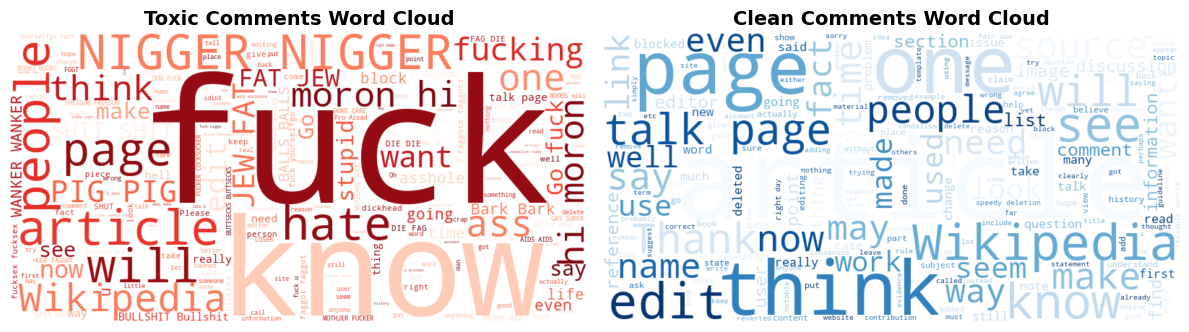

In [53]:
# Word cloud for toxic and non toxic comments
train_data['is_toxic'] = train_data[column_labels].sum(axis=1) > 0

# Separate toxic and clean comments
toxic_comments = train_data[train_data['is_toxic'] == 1]['comment_text']
clean_comments = train_data[train_data['is_toxic'] == 0]['comment_text']

# Combine all toxic and clean comments into one string
toxic_text = " ".join(toxic_comments)
clean_text = " ".join(clean_comments)

# Create WordCloud objects for both toxic and clean comments
toxic_wordcloud = WordCloud(
    width=800, height=400, 
    background_color='white', 
    colormap='Reds', 
    max_words=200, 
    contour_width=1, contour_color='black'
).generate(toxic_text)

clean_wordcloud = WordCloud(
    width=800, height=400, 
    background_color='white', 
    colormap='Blues', 
    max_words=200, 
    contour_width=1, contour_color='black'
).generate(clean_text)

# Plot the word clouds side by side
plt.figure(figsize=(12, 6))

# Plot Toxic Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Toxic Comments Word Cloud', fontsize=14, fontweight='bold')

# Plot Clean Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(clean_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Clean Comments Word Cloud', fontsize=14, fontweight='bold')

# Display the word clouds
plt.tight_layout()
plt.show()

we can spot is that some words are frequent in both category. This means that toxicity not only is about singular foul words, but also the context in which the words are used in (surrounding words) this is why we are also using feature extractors that can take into account semantics

In [20]:
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,is_toxic,Multi_label_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,False,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,False,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,False,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,False,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,False,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,False,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,False,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,False,0


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 6.2 µs
Multi-label comments: 9865


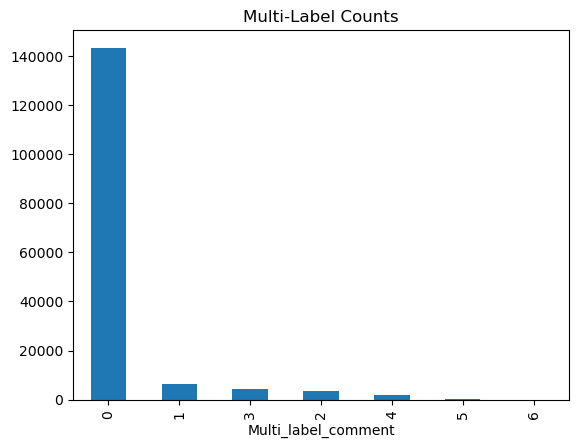

In [21]:
%time
# Multi-label comment analysis
train_data['Multi_label_comment'] = train_data[label_columns].sum(axis=1)
print(f"Multi-label comments: {(train_data['Multi_label_comment'] > 1).sum()}")
train_data['Multi_label_comment'].value_counts().plot(kind='bar', title="Multi-Label Counts")
plt.show()

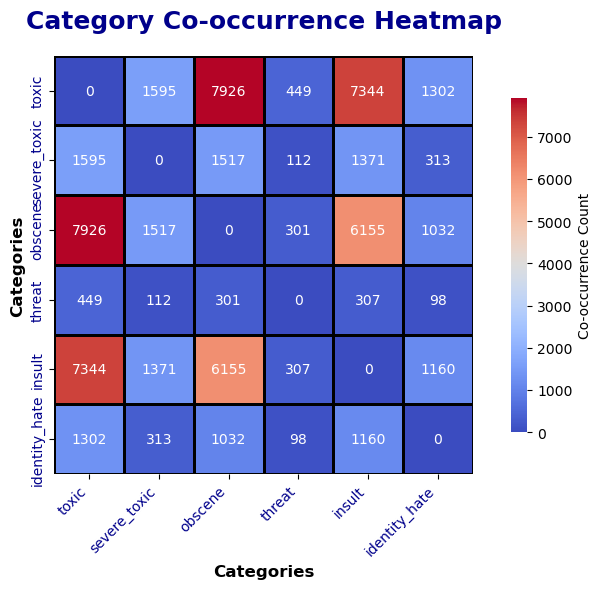

In [22]:
# co-occurrence matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
co_occurrence_matrix = train_data[label_cols].T.dot(train_data[label_cols])


np.fill_diagonal(co_occurrence_matrix.values, 0)


plt.figure(figsize=(8, 6))
sns.heatmap(
    co_occurrence_matrix,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    cbar=True,
    cbar_kws={'shrink': 0.8, 'label': 'Co-occurrence Count'},
    linewidths=1,
    linecolor='black',
    square=True
)

# Add title and axis labels
plt.title("Category Co-occurrence Heatmap", fontsize=18, fontweight="bold", pad=20, color="darkblue")
plt.xlabel("Categories", fontsize=12, fontweight="bold")
plt.ylabel("Categories", fontsize=12, fontweight="bold")


plt.xticks(fontsize=10, rotation=45, ha="right", color="darkblue")
plt.yticks(fontsize=10, color="darkblue")  


plt.tight_layout()
plt.show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


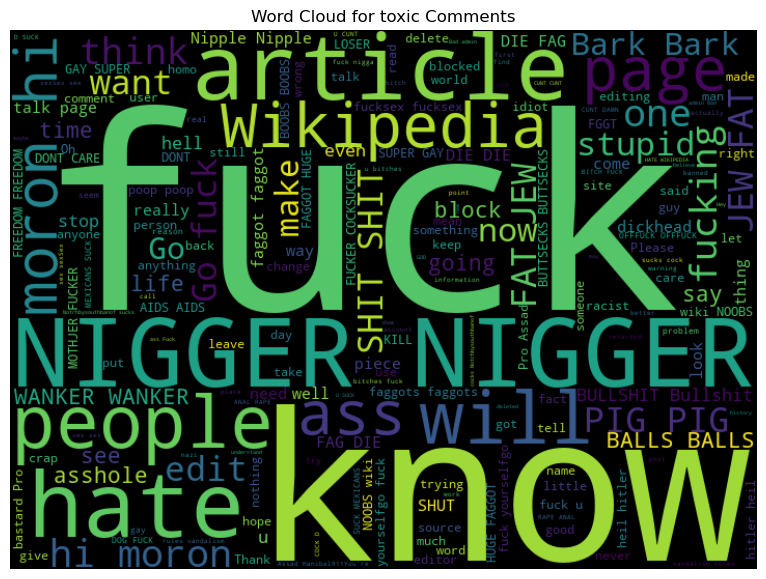

Top 20 words used in toxic comments:
             Word  Normalized Frequencies
0            fuck              100.000000
1            know               54.105534
2   NIGGER NIGGER               51.866152
3         article               46.460746
4            hate               46.332046
5          people               44.736165
6            will               44.272844
7       Wikipedia               41.956242
8            page               40.926641
9             ass               40.592021
10       moron hi               37.966538
11       hi moron               37.889318
12            one               37.039897
13        fucking               35.649936
14          think               33.101673
15        PIG PIG               32.149292
16        JEW FAT               31.763192
17        FAT JEW               31.557272
18           want               30.296010
19           edit               30.141570


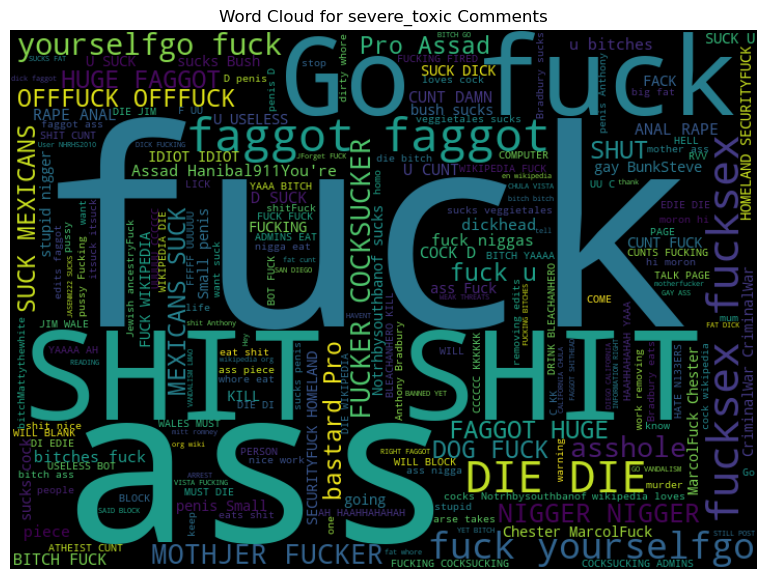

Top 20 words used in severe_toxic comments:
                 Word  Normalized Frequencies
0                fuck              100.000000
1                 ass               58.735632
2           SHIT SHIT               57.471264
3             Go fuck               53.045977
4       faggot faggot               40.977011
5             DIE DIE               36.321839
6     fucksex fucksex               35.804598
7     fuck yourselfgo               35.689655
8     yourselfgo fuck               35.689655
9             asshole               30.172414
10     MOTHJER FUCKER               28.103448
11  FUCKER COCKSUCKER               28.103448
12      NIGGER NIGGER               25.689655
13        HUGE FAGGOT               23.908046
14        FAGGOT HUGE               23.908046
15               SHUT               23.333333
16             fuck u               21.551724
17    OFFFUCK OFFFUCK               20.632184
18      MEXICANS SUCK               20.459770
19      SUCK MEXICANS               

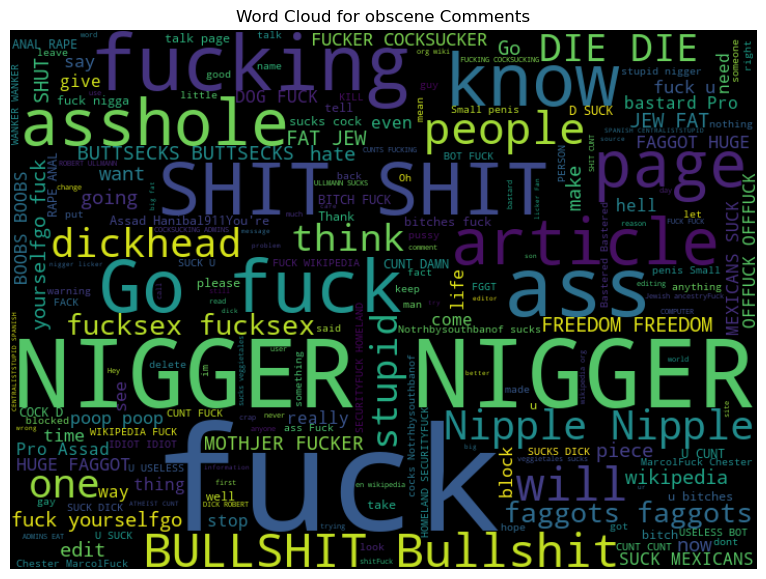

Top 20 words used in obscene comments:
                 Word  Normalized Frequencies
0                fuck              100.000000
1       NIGGER NIGGER               60.601504
2                 ass               44.751880
3             fucking               38.045113
4           SHIT SHIT               34.436090
5                know               34.225564
6             Go fuck               33.744361
7             asshole               26.165414
8             article               25.954887
9                page               25.413534
10  BULLSHIT Bullshit               24.992481
11               will               24.781955
12             people               22.947368
13      Nipple Nipple               22.947368
14                one               21.293233
15           dickhead               21.293233
16              think               19.248120
17            DIE DIE               19.248120
18             stupid               18.766917
19    faggots faggots               18.76

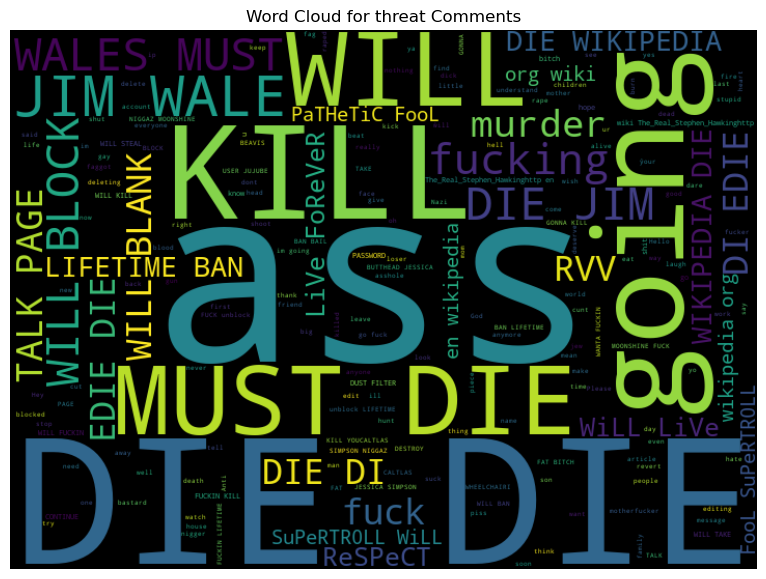

Top 20 words used in threat comments:
             Word  Normalized Frequencies
0             ass              100.000000
1         DIE DIE               82.942708
2            KILL               39.973958
3           going               36.458333
4            WILL               23.697917
5        MUST DIE               20.833333
6        JIM WALE               20.572917
7      WALES MUST               20.312500
8         DIE JIM               20.312500
9      WILL BLOCK               19.401042
10        fucking               17.968750
11         murder               13.932292
12      TALK PAGE               13.151042
13            RVV               12.500000
14           fuck               12.239583
15     WILL BLANK               12.239583
16         DIE DI               11.718750
17        DI EDIE               11.718750
18       EDIE DIE               11.718750
19  DIE WIKIPEDIA               11.588542


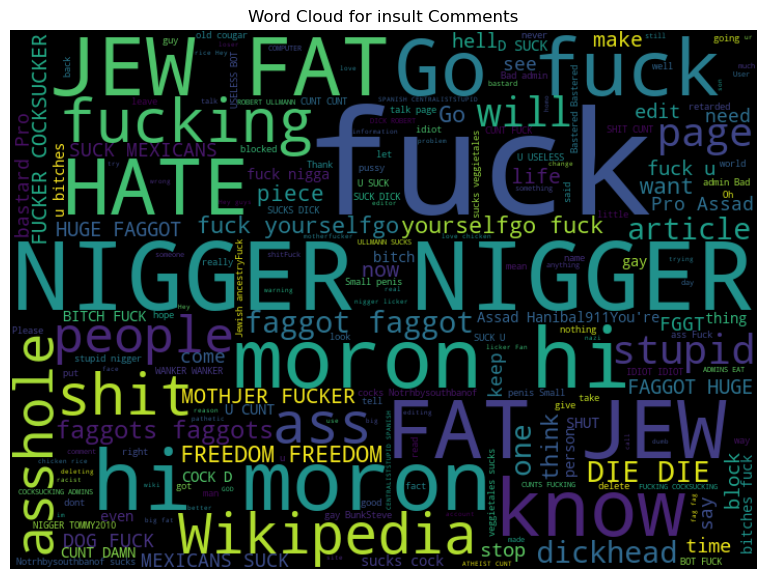

Top 20 words used in insult comments:
             Word  Normalized Frequencies
0            fuck              100.000000
1   NIGGER NIGGER               66.888715
2        moron hi               49.882445
3        hi moron               49.764890
4         JEW FAT               48.354232
5         FAT JEW               48.040752
6            know               44.083072
7            HATE               43.377743
8         Go fuck               42.985893
9         fucking               40.948276
10           shit               36.677116
11      Wikipedia               36.363636
12            ass               35.971787
13        asshole               32.484326
14         people               30.211599
15         stupid               30.172414
16           will               29.858934
17           page               29.271160
18  faggot faggot               28.056426
19       dickhead               27.547022


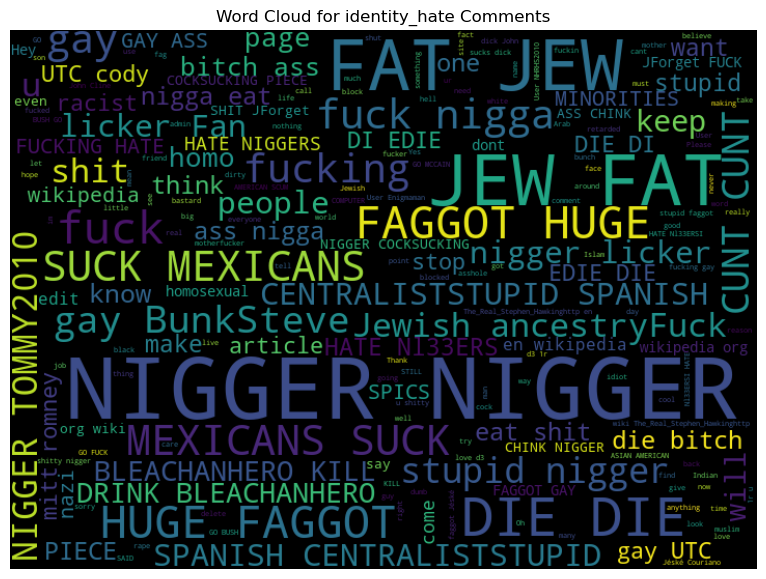

Top 20 words used in identity_hate comments:
                        Word  Normalized Frequencies
0              NIGGER NIGGER              100.000000
1                    JEW FAT               64.913204
2                    FAT JEW               64.492372
3                    DIE DIE               33.350868
4                HUGE FAGGOT               22.041031
5                FAGGOT HUGE               21.883219
6                       fuck               21.725408
7              MEXICANS SUCK               18.726986
8              SUCK MEXICANS               18.674382
9                 fuck nigga               17.727512
10                       gay               17.517096
11                   fucking               16.570226
12             gay BunkSteve               14.571278
13                 CUNT CUNT               14.518674
14             stupid nigger               12.730142
15          NIGGER TOMMY2010               11.888480
16       Jewish ancestryFuck               10.941610
1

In [23]:
%time
# Word Cloud for toxic comments
from wordcloud import WordCloud

def plot_wordcloud(df, column_name, width=720, height=520):
    if column_name not in label_columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return
    
    text = ' '.join(df[df[column_name] == 1]['comment_text'])
    wordcloud = WordCloud(width=width, height=height, background_color='black').generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column_name} Comments')
    plt.show()
    
 # Display Top 20 Words
    word_frequencies = wordcloud.words_
    words = pd.DataFrame(word_frequencies, index=[0]).T[:20]
    words.reset_index(inplace=True)
    words.rename(columns={0: 'Normalized Frequencies', 'index': 'Word'}, inplace=True)
    words['Normalized Frequencies'] = words['Normalized Frequencies'] * 100
    print(f'Top 20 words used in {column_name} comments:')
    print(words.head(20))


for label in label_columns:
    plot_wordcloud(train_data, label)

In [24]:
%time
# N-gram analysis to see which toxic comments always goes together
def get_top_ngrams(df, column_name, ngram_range, n=None):
    if column_name not in label_columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return

    corpus = df[df[column_name] == 1]['comment_text']
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=n).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:n]
    top_ngrams_df = pd.DataFrame(top_ngrams, columns=["Words", "Count"])
    print(f"Top {n} {ngram_range} in {column_name}:")
    print(top_ngrams_df.head(10))

# top bi-grams and tri-grams for each category
for label in label_columns:
    print(f"Displaying for {label} comments:")
    print(f"Top 10 bi-grams:")
    get_top_ngrams(train_data, label, ngram_range=(2, 2), n=10)
    print("-----------------------------------------------------------------------------")
    print(f"Top 10 tri-grams:")
    get_top_ngrams(train_data, label, ngram_range=(3, 3), n=10)
    print("-----------------------------------------------------------------------------")
    print("-----------------------------------------------------------------------------")

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs
Displaying for toxic comments:
Top 10 bi-grams:
Top 10 (2, 2) in toxic:
           Words  Count
0        you are   4321
1       fuck you   3748
2  nigger nigger   2015
3         in the   1807
4         you re   1765
5       you fuck   1716
6       hate you   1567
7         of the   1474
8       moron hi   1474
9       hi moron   1472
-----------------------------------------------------------------------------
Top 10 tri-grams:
Top 10 (3, 3) in toxic:
                  Words  Count
0  nigger nigger nigger   2006
1         fuck you fuck   1580
2          you fuck you   1576
3           hi moron hi   1468
4        moron hi moron   1466
5          you hate you   1429
6         hate you hate   1412
7           pig pig pig   1248
8           fat jew fat   1226
9           jew fat jew   1224
-----------------------------------------------------------------------------
-------------------------------------------------------------

# TEXT PREPROCESSING 

In [31]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [50]:
import re
import pandas as pd
import spacy
import contractions
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from tqdm import tqdm
import string
import nltk
from multiprocessing import Pool

# Load spaCy model
spacy_model = spacy.load("en_core_web_sm")
spacy_stopwords = spacy_model.Defaults.stop_words

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

class ToxicCommentPreprocessor:
    """
    A comprehensive text preprocessing pipeline tailored for toxic comment classification.
    """

    def __init__(self, 
                 remove_stopwords=True, 
                 use_lemmatization=True, 
                 use_stemming=False, 
                 retain_case=False, 
                 filter_token_length=True,  # Token length filtering
                 min_token_length=2, 
                 max_token_length=15, 
                 custom_stopwords=None, 
                 language="en_core_web_sm"):
        self.remove_stopwords = remove_stopwords
        self.use_lemmatization = use_lemmatization
        self.use_stemming = use_stemming
        self.retain_case = retain_case
        self.filter_token_length = filter_token_length
        self.min_token_length = min_token_length
        self.max_token_length = max_token_length
        self.custom_stopwords = custom_stopwords or set()
        
        # Unified stopwords from spaCy and NLTK
        self.stopwords = set(stopwords.words("english")).union(spacy_stopwords, self.custom_stopwords)
        self.nlp = spacy.load(language)
        self.stemmer = SnowballStemmer("english")

    @staticmethod
    def clean_text(text):
        """
        Basic text cleaning:
        - Expand contractions
        - Remove URLs, emails, numbers, and excessive whitespace
        - Normalize repeated characters
        - Replace emojis with text descriptions
        """
        try:
            # Expand contractions
            text = contractions.fix(text)
            
            # Replace emojis with text descriptions
            text = emoji.demojize(text, delimiters=(" ", " "))
            
            # Remove URLs and emails
            text = re.sub(r"http\S+|www\S+|mailto:\S+", " ", text)
            
            # Remove special characters (keep spaces and word characters)
            text = re.sub(r"[^\w\s]", " ", text)
            
            # Normalize repeated characters (e.g., "loooove" -> "loove")
            text = re.sub(r"(.)\1{2,}", r"\1\1", text)
            
            # Remove numbers
            text = re.sub(r"\d+", " ", text)
            
            # Handle excessive whitespace
            text = re.sub(r"\s+", " ", text).strip()
        except Exception as e:
            print(f"Error cleaning text: {e}")
            text = ""
        return text

    def tokenize_and_filter(self, text):
        """
        Tokenize, remove stopwords, filter tokens by length, and apply lemmatization or stemming (if enabled).
        """
        # Optionally retain case
        if not self.retain_case:
            text = text.lower()
        
        if self.use_lemmatization:
            doc = self.nlp(text)
            tokens = [
                token.lemma_ for token in doc
                if (
                    (not self.remove_stopwords or 
                     (token.text.lower() not in self.stopwords)) and
                    (not self.filter_token_length or 
                     (self.min_token_length <= len(token.text) <= self.max_token_length))
                )
            ]
        elif self.use_stemming:
            tokens = [
                self.stemmer.stem(word) for word in word_tokenize(text)
                if (
                    (not self.remove_stopwords or 
                     (word.lower() not in self.stopwords)) and
                    (not self.filter_token_length or 
                     (self.min_token_length <= len(word) <= self.max_token_length))
                )
            ]
        else:
            tokens = [
                word for word in word_tokenize(text)
                if (
                    (not self.remove_stopwords or 
                     (word.lower() not in self.stopwords)) and
                    (not self.filter_token_length or 
                     (self.min_token_length <= len(word) <= self.max_token_length))
                )
            ]
        
        return " ".join(tokens)

    def preprocess_text(self, text):
        """
        Preprocess a single text input.
        """
        # Clean text
        text = self.clean_text(text)
        
        # Tokenize and filter
        text = self.tokenize_and_filter(text)
        
        return text

    def preprocess_dataframe(self, df, text_column, new_column="processed_text", parallelize=False):
        """
        Apply preprocessing to a DataFrame column.
        - Keeps original text alongside processed text for interpretability.
        - Option to parallelize for large datasets.
        """
        if parallelize:
            with Pool() as pool:
                df[new_column] = pool.map(self.preprocess_text, df[text_column])
        else:
            tqdm.pandas(desc="Preprocessing text")
            df[new_column] = df[text_column].progress_apply(self.preprocess_text)
        
        return df


# Initialize preprocessor with recommendations applied
preprocessor = ToxicCommentPreprocessor(
    remove_stopwords=True,
    use_lemmatization=True,
    use_stemming=False,
    retain_case=False,
    filter_token_length=True, 
    min_token_length=2,
    max_token_length=15,
    custom_stopwords={"you", "your", "not"}
)


# Preprocess the 'comment_text' column in the train dataset
train_data = preprocessor.preprocess_dataframe(train_data, text_column="comment_text", new_column="processed_text")


# Preview processed data
print("Processed Train Data:")
print(train_data.head())

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Preprocessing text:  71%|███████   | 113662/159571 [21:24<06:37, 115.53it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Preprocessing text: 100%|██████████| 159571/159571 [29:55<00:00, 88.88it/s] 

Processed Train Data:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  is_toxic  \
0             0        0       0       0              0     False   
1             0        0       0       0              0     False   
2             0        0       0       0              0     False   
3             0        0       0       0              0     False   
4             0        0       0       0              0     False   

   Multi_label_comment                                     processed_text  


# Feature extraction

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec, FastText
from gensim.downloader import load
from tqdm import tqdm
import logging

# Set up logging for tracking progress and debugging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Subsample for computational efficiency
subsample = train_data.sample(15000, random_state=42) 
tqdm.pandas()  

# visualize embeddings
def visualize_embeddings(embeddings, method_name):
    """Reusable visualization for PCA and t-SNE."""
    # PCA Visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1])
    plt.title(f"PCA Visualization of {method_name}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

    # t-SNE Visualization
    tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=30)
    tsne_features = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1])
    plt.title(f"t-SNE Visualization of {method_name}")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.show()

# for computing document embeddings
def calculate_document_embeddings(tokenized_texts, embedding_model, vector_size):
    """Compute document embeddings by averaging word vectors."""
    return np.array([
        np.mean(
            [embedding_model.wv[word] for word in text if word in embedding_model.wv] or [np.zeros(vector_size)], 
            axis=0
        )
        for text in tqdm(tokenized_texts, desc="Calculating Document Embeddings")
    ])

In [54]:
# # # Custom tokenizer that does nothing - to avoid running tokenization again
# def do_nothing(lemmas):
#     return lemmas

### BOW

2024-11-22 00:56:39,238 - INFO - Extracting Bag-of-Words Features...
2024-11-22 00:56:42,549 - INFO - Bag-of-Words Feature Matrix Shape: (159571, 500)


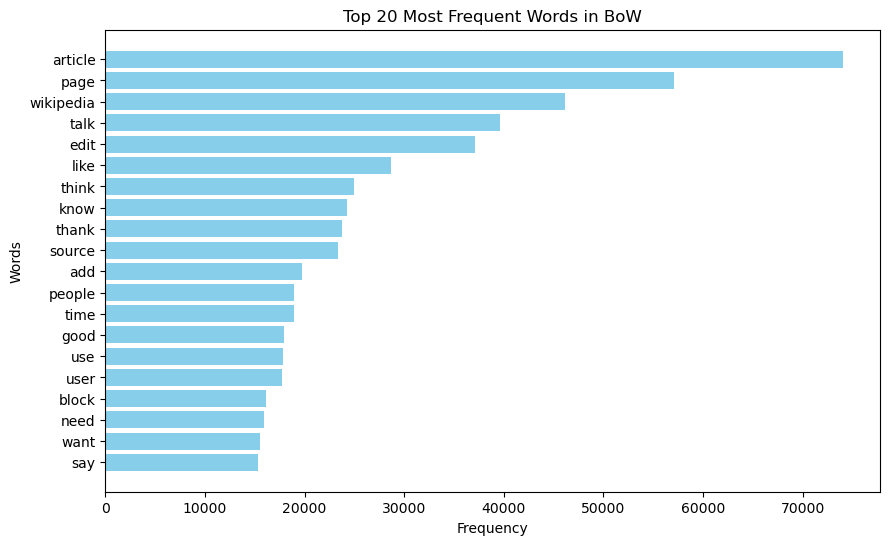

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



logging.info("Extracting Bag-of-Words Features...")


count_vectorizer = CountVectorizer(
    max_features=500, 
    min_df=0.00005,  
    stop_words=None,  # Custom stopwords are handled during preprocessing
    tokenizer=None  # Don't run tokenization again
)

bow_features = count_vectorizer.fit_transform(train_data['processed_text'])
logging.info(f"Bag-of-Words Feature Matrix Shape: {bow_features.shape}")

# Analyze most common words
word_freq = np.array(bow_features.sum(axis=0)).flatten()
words = count_vectorizer.get_feature_names_out()
top_words = pd.DataFrame({"Word": words, "Frequency": word_freq}).sort_values(by="Frequency", ascending=False)

# Visualize top 20 most frequent words
plt.figure(figsize=(10, 6))
plt.barh(top_words["Word"].head(20), top_words["Frequency"].head(20), color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Frequent Words in BoW")
plt.gca().invert_yaxis()
plt.show()


In [88]:
#Convert the BoW feature matrix to a dense format
bow_dense = bow_features.toarray()

# Get feature names (words)
bow_feature_names = count_vectorizer.get_feature_names_out()

# Create a DataFrame with BoW features
bow_df = pd.DataFrame(bow_dense, columns=bow_feature_names)

# Display a sample of the DataFrame
print("Bag-of-Words Features DataFrame:")
bow_df.tail()

Bag-of-Words Features DataFrame:


,able,abuse,accept,accord,account,accuse,act,action,actually,add,...,woman,wonder,word,work,world,wp,write,wrong,year,yes
159566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159569,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
159570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [89]:
# TF-IDF
logging.info("Extracting TF-IDF Features...")
tfidf_vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2), stop_words=None, tokenizer=None)
tfidf_features = tfidf_vectorizer.fit_transform(subsample['processed_text'])
logging.info(f"TF-IDF Feature Matrix Shape: {tfidf_features.shape}")

# Analyze TF-IDF weights
tfidf_weights = np.array(tfidf_features.sum(axis=0)).flatten()
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_top_words = pd.DataFrame({"Word": tfidf_words, "Weight": tfidf_weights}).sort_values(by="Weight", ascending=False)

2024-11-22 00:56:54,101 - INFO - Extracting TF-IDF Features...
2024-11-22 00:56:55,460 - INFO - TF-IDF Feature Matrix Shape: (15000, 500)


In [92]:
# TF-IDF Feature DataFrame
dense_tfidf = tfidf_features.todense()
tfidf_df = pd.DataFrame(dense_tfidf, columns=tfidf_vectorizer.get_feature_names_out())
logging.info(f"TF-IDF DataFrame Shape: {tfidf_df.shape}")

# Inspect the resulting DataFrame
print("Sample TF-IDF Features:")
print(tfidf_df.tail(20))

2024-11-22 00:57:16,999 - INFO - TF-IDF DataFrame Shape: (15000, 500)


Sample TF-IDF Features:
       able  accept    access  access deneid  accord  account  act  action  \
14980   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14981   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14982   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14983   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14984   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14985   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14986   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14987   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14988   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14989   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14990   0.0     0.0  0.000000            0.0     0.0      0.0  0.0     0.0   
14991   0.0     0.0  0.000000           

### Word2Vec

2024-11-22 01:02:15,871 - INFO - Training Word2Vec Model...
100%|██████████| 15000/15000 [00:00<00:00, 295886.11it/s]
2024-11-22 01:02:15,926 - INFO - collecting all words and their counts
2024-11-22 01:02:15,927 - INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-11-22 01:02:15,976 - INFO - PROGRESS: at sentence #10000, processed 285991 words, keeping 27265 word types
2024-11-22 01:02:16,001 - INFO - collected 34742 word types from a corpus of 427476 raw words and 15000 sentences
2024-11-22 01:02:16,001 - INFO - Creating a fresh vocabulary
2024-11-22 01:02:16,051 - INFO - Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 16812 unique words (48.39% of original 34742, drops 17930)', 'datetime': '2024-11-22T01:02:16.051117', 'gensim': '4.3.3', 'python': '3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:23:14) [GCC 10.4.0]', 'platform': 'Linux-5.4.0-174-generic-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
2024-11-22 01:02:16,052 - IN

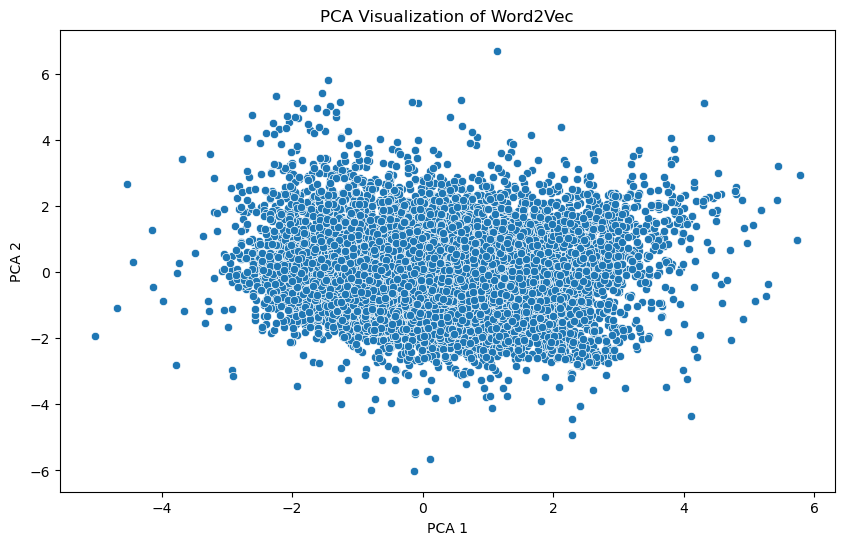

In [ ]:
# Word2Vec
logging.info("Training Word2Vec Model...")
tokenized_texts = subsample['processed_text'].progress_apply(str.split).tolist()
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, sg=0, epochs=10)
doc_embeddings_word2vec = calculate_document_embeddings(tokenized_texts, word2vec_model, vector_size=100)
logging.info(f"Word2Vec Document Embeddings Shape: {doc_embeddings_word2vec.shape}")
visualize_embeddings(doc_embeddings_word2vec, "Word2Vec")

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(doc_embeddings_word2vec)
labels = kmeans.labels_
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=labels, palette="tab10")
plt.title("Clusters in Word2Vec Embeddings")
plt.show()

### GloVe

In [ ]:
# GloVe
logging.info("Loading GloVe Model...")
glove_model = load("glove-wiki-gigaword-50")
doc_embeddings_glove = np.array([
    np.mean(
        [glove_model[word] for word in text if word in glove_model] or [np.zeros(50)], 
        axis=0
    )
    for text in tqdm(tokenized_texts, desc="Calculating GloVe Document Embeddings")
])
logging.info(f"GloVe Document Embeddings Shape: {doc_embeddings_glove.shape}")
visualize_embeddings(doc_embeddings_glove, "GloVe")

### FastText

In [ ]:
# FastText
logging.info("Training FastText Model...")
fasttext_model = FastText(sentences=tokenized_texts, vector_size=100, window=5, min_count=2, sg=0, epochs=10)
doc_embeddings_fasttext = calculate_document_embeddings(tokenized_texts, fasttext_model, vector_size=100)
logging.info(f"FastText Document Embeddings Shape: {doc_embeddings_fasttext.shape}")
visualize_embeddings(doc_embeddings_fasttext, "FastText")